# Linear regression with one variable

In [15]:
import numpy as np
import pandas as pd
import random, os
import matplotlib.pyplot as plt

#### load the datasts

In [106]:
#datapath = r'C:\Users\rajeev\Desktop\Machine_Learning_AZ_Template_Folder\basic_ML\data/'
datapath = %pwd
data = np.loadtxt(datapath+'house_price.txt', dtype=np.int32, delimiter=',')

In [43]:
data[:5]

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900]])

In [44]:
# break the data into x & y
X = data[::,0:2] 
Y = data[::,2:3]
len(X), len(Y)

(47, 47)

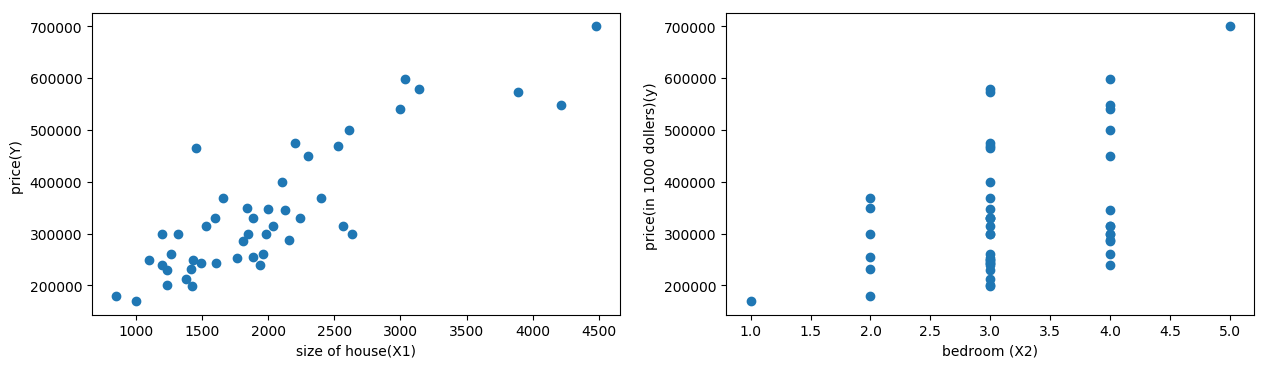

In [45]:
# plotting example datasets
plt.figure(figsize=(15,4), dpi=100)
plt.subplot(121)
plt.scatter(X[::,0:1],Y)
plt.xlabel("size of house(X1)")
plt.ylabel("price(Y) ")

plt.subplot(122)
plt.scatter(X[::,1:2],Y)
plt.xlabel("bedroom (X2)")
plt.ylabel("price(in 1000 dollers)(y) ")

plt.show()

In [92]:
# intoduce weight of hypothesis
Theta = np.random.rand(1,3)
# m is total example set, n is number of features
m,n = X.shape

# add bias to input matrix by sample make x0 = 1 for all
X_bias = np.ones((m, n+1))
X_bias[::,1:] = X

print("X_bias = \n", X_bias[0:5,:])
print("Y = \n", Y[0:5,::])

X_bias = 
 [[  1.00000000e+00   2.10400000e+03   3.00000000e+00]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00]
 [  1.00000000e+00   1.41600000e+03   2.00000000e+00]
 [  1.00000000e+00   3.00000000e+03   4.00000000e+00]]
Y = 
 [[399900]
 [329900]
 [369000]
 [232000]
 [539900]]


In [93]:
#feature scaling
mean_size = np.mean(X_bias[::,1:2])
mean_bedroom = np.mean(X_bias[::,2:])
size_std = np.std(X_bias[::, 1:2])
bedroom_std = np.std(X_bias[::,2:])
X_bias[::,1:2] = (X_bias[::, 1:2] - mean_size) / (size_std)
X_bias[::,2:] = (X_bias[::,2:] - mean_bedroom) / (bedroom_std)
X_bias[0:5,::]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [94]:
#define function to find the cost
def cost(X_bias, Y, Theta):
    np.seterr(over='raise')
    m, n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis - Y)).sum(axis = 0))

In [95]:
#define gradient descent algorithm from minimizing theta
def gradient_Descent(X_bias, Y, Theta, iterations, alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis - Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis - Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,2] - alpha*(1.0/m)*((hypothesis - Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        cost_log = np.append(cost_log, cost(X_bias,Y, Theta))
        count = count+1
    plt.plot(np.linspace(1, iterations, iterations, endpoint=True), cost_log)
    plt.title("Iteration vs Cost graph")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of theta")
    plt.show()
    
    return Theta

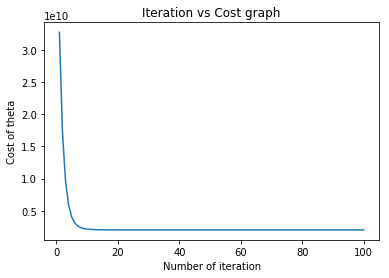

Theta: [[ 340412.65957447  109447.75525946   -6578.31364398]]


In [96]:
alpha = 0.3
iterations = 100
Theta = gradient_Descent(X_bias, Y, Theta, iterations, alpha)
print("Theta:",Theta)

In [102]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3])
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (size_std) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is  [ 293081.4733991]
